In [1]:
#Import useful libraries
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
print("FATTO")

FATTO


In [2]:
#load dataset used for analysis
dtypes = {"id":'str',"timestamp":'float',"longitude":'float',"latitude":'float',"annotation":'str', "speed":'float'}
data = pd.read_csv("ais_brest_synopses.csv",usecols=["longitude","latitude","timestamp","id", "annotation", "speed"],dtype=dtypes)

In [3]:
dtypes = {"event":'str',"id":'str',"argument":'str',"value":'str',"timestamp1":'int', "timestamp2":'int'}
data_kafka = pd.read_csv("C:\\Users\\emiso\\Desktop\\Situation Awareness\\Data\\Maritime Composite Events\\CEs\\recognised_CEs.csv", usecols=["event","id","argument","value","timestamp1","timestamp2"],dtype=dtypes, sep ='|')

#dtypes = {"event":'str',"id":'float',"argument":'string',"value":'string',"timestamp1":'string', "timestamp2":'string'}
#data_kafka2 = pd.read_csv("C:\\Users\\emiso\\Desktop\\Situation Awareness\\Data\\Maritime Composite Events\\CEs\\recognised_CEs.csv", usecols=["event","id","argument","value","timestamp1","timestamp2"],dtype=dtypes, sep ='|')

In [ ]:
#controllo numero di trawling

data_kafka_trawling_hour = data_kafka[((data_kafka['event'] == 'trawling') & ((data_kafka['timestamp2'] - data_kafka['timestamp1'])>3200))]

data_kafka_grouped = data_kafka_trawling_hour.groupby(['id']).id.agg('count').to_frame('count')
sum=0

sum=data_kafka_grouped['count'].sum()

print(sum)


In [ ]:
print("START")
data_kafka_oct = data_kafka[((data_kafka['event'] == 'trawling') & (data_kafka['timestamp1']<1446332400))]
data_kafka_oct.head(5)

In [ ]:
data_kafka_grouped_oct = data_kafka_oct.groupby(['id']).id.agg('count').to_frame('count')
sum=0

sum=data_kafka_grouped_oct['count'].sum()
print(sum)

In [25]:
data_analisi = data_kafka[((data_kafka['event'] == 'trawlSpeed') & (data_kafka['id'] == "228109000") & (data_kafka['timestamp1'] >= 1443834944) & (data_kafka['timestamp2'] <= 1443850850))]
data_analisi['data1'] = pd.to_datetime(data_analisi['timestamp1'], unit='s')
data_analisi['data2'] = pd.to_datetime(data_analisi['timestamp2'], unit='s')
data_analisi['day1'] = pd.DatetimeIndex(data_analisi['data1']).day
data_analisi['day2'] = pd.DatetimeIndex(data_analisi['data2']).day
data_analisi['time1'] = pd.DatetimeIndex(data_analisi['data1']).time
data_analisi['time2'] = pd.DatetimeIndex(data_analisi['data2']).time

<ipython-input-25-43653cc78e78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_analisi['data1'] = pd.to_datetime(data_analisi['timestamp1'], unit='s')
<ipython-input-25-43653cc78e78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_analisi['data2'] = pd.to_datetime(data_analisi['timestamp2'], unit='s')
<ipython-input-25-43653cc78e78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [22]:
dtypes = {"id":'str',"timestamp":'int64',"longitude":'float',"latitude":'float',"annotation":'str',"speed":'float',"heading":'str',"shiptype":'str'}
data_types = pd.read_csv("ais_data_types.csv",usecols=["id", "timestamp", "longitude","latitude", "annotation","speed","heading","shiptype"],dtype=dtypes)

In [20]:
#data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]


#intervallo in cui torna al porto, riesce, e fa trawl per meno di un'ora
#data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443965432000) & (data['timestamp'] <= 1444244942000))]
#quello di sopra + i suoi 60 minuti di pesca
#data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443965432000) & (data['timestamp'] <= 1444248562000))]

#strisciata lenta in area di pesca
#data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1444269892000) & (data['timestamp'] <= 1444282242000))]

#no trawl perchè manca change in heading oppure velocità sotto 1.0
#data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1445646530000) & (data['timestamp'] <= 1445647931000))]




In [25]:
data_show = data_types[data_types['timestamp'] <= 1446336000000]
data_show.to_csv('trawling_test.csv', index=False, columns=["id", "timestamp", "longitude","latitude", "annotation","speed","heading","shiptype"])

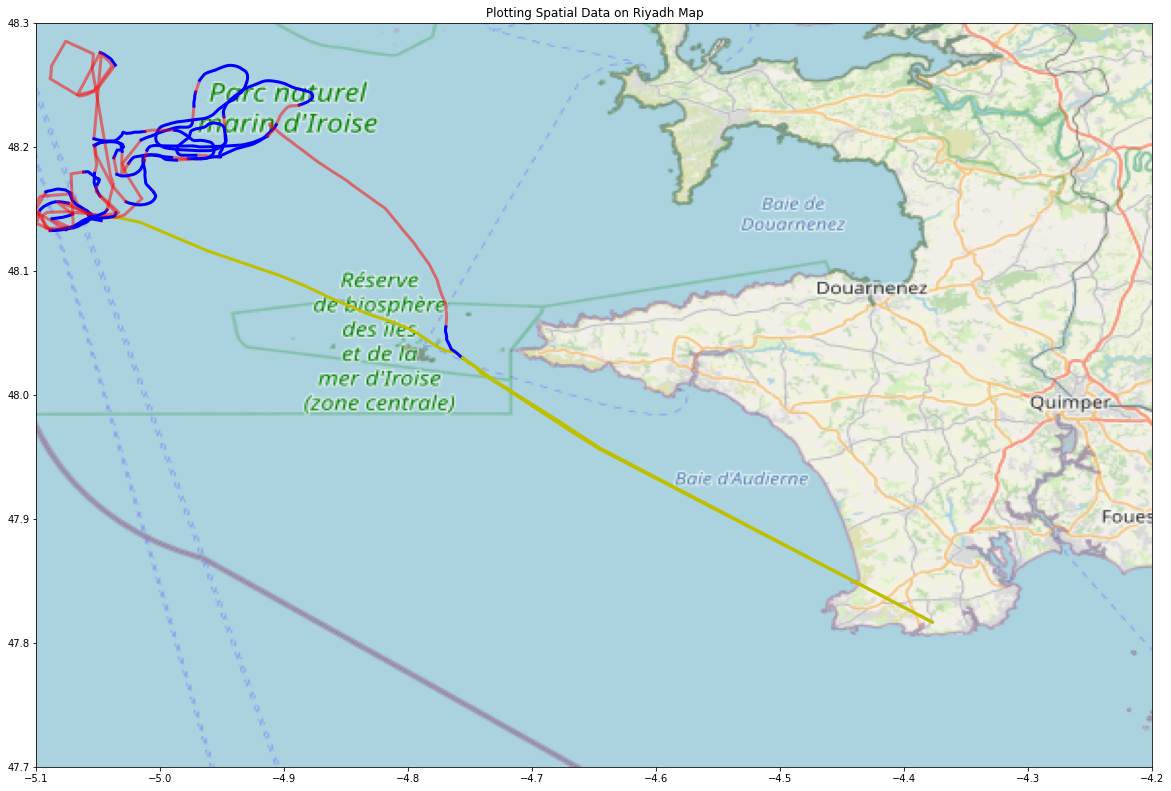

In [128]:
#Plotting delle traiettorie e dei trawling identificato dal lavoro dataAcron

data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ruh_m = plt.imread('map_from_start_extended.png')
fig, ax = plt.subplots(figsize=(20,25))

#trawl
dtypes = {"start":'int64',"stop":'int64'}
data_traj = pd.read_csv('traj_228109000_0.csv', sep=',', usecols = ['start','stop'], dtype=dtypes, header=0)
t = False
data_traj['diff1'] = 0
data_traj['diff2'] = 0
data_show = data[((data['id']  == "228109000")  & (data['timestamp'] >= 1443701682000)  & (data['timestamp'] <= 1443782571000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)
for index, row in data_traj.iterrows():
    if index < len(data_traj)-1:
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['start']) & (data['timestamp'] <= row['stop']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['stop']) & (data['timestamp'] <= data_traj['start'][index+1]))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=0.5, c='r', linewidth=3)
        data_traj['diff1'][index] = (row['stop'] - row['start'])/(60*1000)
        data_traj['diff2'][index] = (data_traj['start'][index+1] - row['stop'])/(60*1000)
        #t=True
    else:
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['start']) & (data['timestamp'] <= row['stop']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)        
        #t=False
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443975692000) & (data['timestamp'] <= 1444039692000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)


ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(-5.1,-4.2)
ax.set_ylim(47.7,48.3)


BBox2=((-5.1,-4.2,47.7,48.3))
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')
plt.savefig('228109000_0.png')

<ipython-input-144-fd65c044aee8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['timestamp1'] = data_traj['timestamp1'].apply(lambda x: x*1000)
<ipython-input-144-fd65c044aee8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['timestamp2'] = data_traj['timestamp2'].apply(lambda x: x*1000)


0
1
2
3
4
5
6
7
8


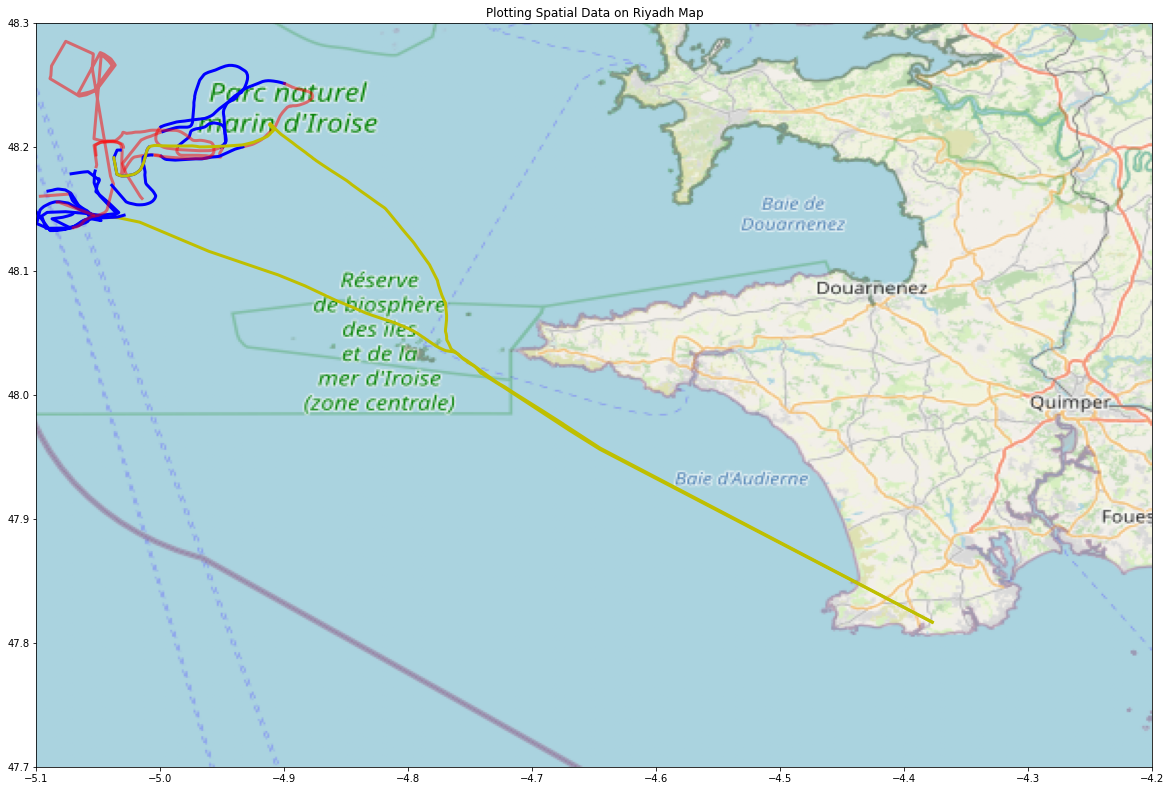

In [144]:
#Plotting delle traiettorie e dei trawling identificato dal lavoro dataAcron

data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ruh_m = plt.imread('map_from_start_extended.png')
fig, ax = plt.subplots(figsize=(20,25))
#trawl
dtypes = {"start":'int64',"stop":'int64'}
#data_traj = pd.read_csv('traj_228109000.csv', sep=',', usecols = ['start','stop'], dtype=dtypes, header=0)
data_traj = data_kafka[((data_kafka['id']=="228109000") & (data_kafka['event']=="trawling") & (data_kafka['timestamp1']>=1443782571) & (data_kafka['timestamp2']<=1443975692))]
#data_traj.to_csv('traj_228109000_search.csv')
data_traj['timestamp1'] = data_traj['timestamp1'].apply(lambda x: x*1000)
data_traj['timestamp2'] = data_traj['timestamp2'].apply(lambda x: x*1000)
data_traj.reset_index(inplace=True)
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443701682000) & (data['timestamp'] <= 1443782571000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)

for i, row in data_traj.iterrows():
    if i < len(data_traj)-1:
        print(i)
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['timestamp1']) & (data['timestamp'] <= row['timestamp2']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['timestamp2']) & (data['timestamp'] <= data_traj['timestamp1'][i+1]))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=0.5, c='r', linewidth=3)
        #data_traj['diff1'][index] = (row['stop'] - row['start'])/(60*1000)
        #data_traj['diff2'][index] = (data_traj['start'][index+1] - row['stop'])/(60*1000)
        #t=True
    else:
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['timestamp1']) & (data['timestamp'] <= row['timestamp2']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)        
        #t=False
    
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443955392000) & (data['timestamp'] <= 1444039692000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)


#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(-5.1,-4.2)
ax.set_ylim(47.7,48.3)




BBox2=((-5.1,-4.2,47.7,48.3))
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')
plt.savefig('228109000_0_search.png')

<ipython-input-131-fc78ea1cb7ef>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['timestamp1'] = data_traj['timestamp1'].apply(lambda x: x*1000)
<ipython-input-131-fc78ea1cb7ef>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['timestamp2'] = data_traj['timestamp2'].apply(lambda x: x*1000)
<ipython-input-131-fc78ea1cb7ef>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


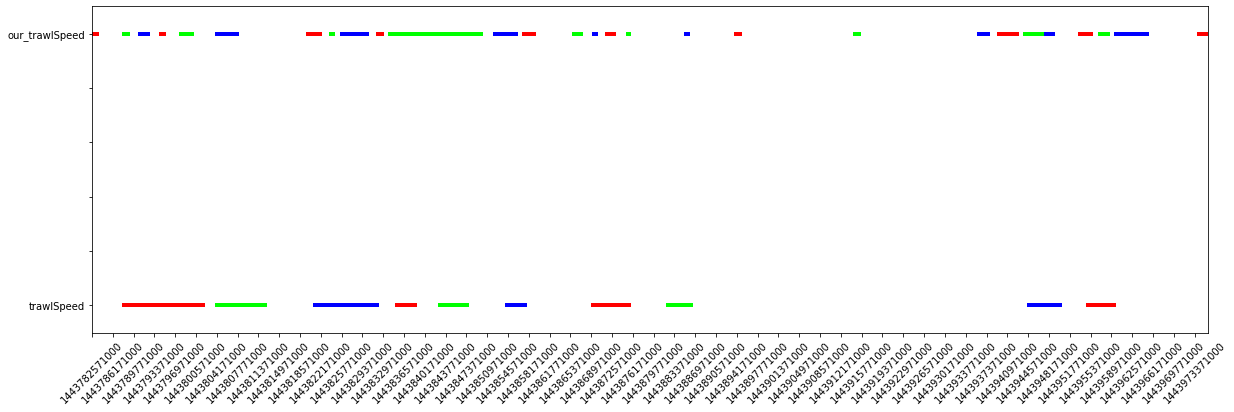

In [131]:
#Analisi di confronto temporale tra gli eventi riconosciuti da noi e quelli del lavoro dataAcron


from matplotlib import collections  as mc
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as dates
import pylab as pl
import numpy as np

#trawl
dtypes = {"start":'int64',"stop":'int64'}
data_traj = pd.read_csv('traj_228109000_0.csv', sep=',', usecols = ['start','stop'], dtype=dtypes, header=0)
list_x1 = data_traj['start'].to_list()
list_x2 = data_traj['stop'].to_list()
lines=[]
for i in range(0, data_traj['start'].shape[0]):
    lines.append([(list_x1[i],2),(list_x2[i],2)])


data_traj = data_kafka[((data_kafka['id']=="228109000") & (data_kafka['event']=="trawling") & (data_kafka['timestamp1']>=1443782571) & (data_kafka['timestamp2']<=1443975692))]
#data_traj.to_csv('traj_228109000_search.csv')
data_traj['timestamp1'] = data_traj['timestamp1'].apply(lambda x: x*1000)
data_traj['timestamp2'] = data_traj['timestamp2'].apply(lambda x: x*1000)
list_x1 = data_traj['timestamp1'].to_list()
list_x2 = data_traj['timestamp2'].to_list()
lines2=[]
for i in range(0, data_traj['timestamp1'].shape[0]):
    lines2.append([(list_x1[i],1),(list_x2[i],1)])

c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mc.LineCollection(lines, colors=c, linewidths=4)
lc2 = mc.LineCollection(lines2, colors=c, linewidths=4)
fig, ax = pl.subplots(figsize=(20,6))
ax.add_collection(lc)
ax.add_collection(lc2)
ax.autoscale()
ax.margins(0.1)

labels=['','trawlSpeed','','','','','our_trawlSpeed']
ax.set_yticklabels(labels)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.xlim([1443782571000, 1443975692000])
plt.xticks(np.arange(1443782571000, 1443975692000, (60*60*1000)))
plt.xticks(rotation=45)

plt.savefig('confronto_traj_0.png')

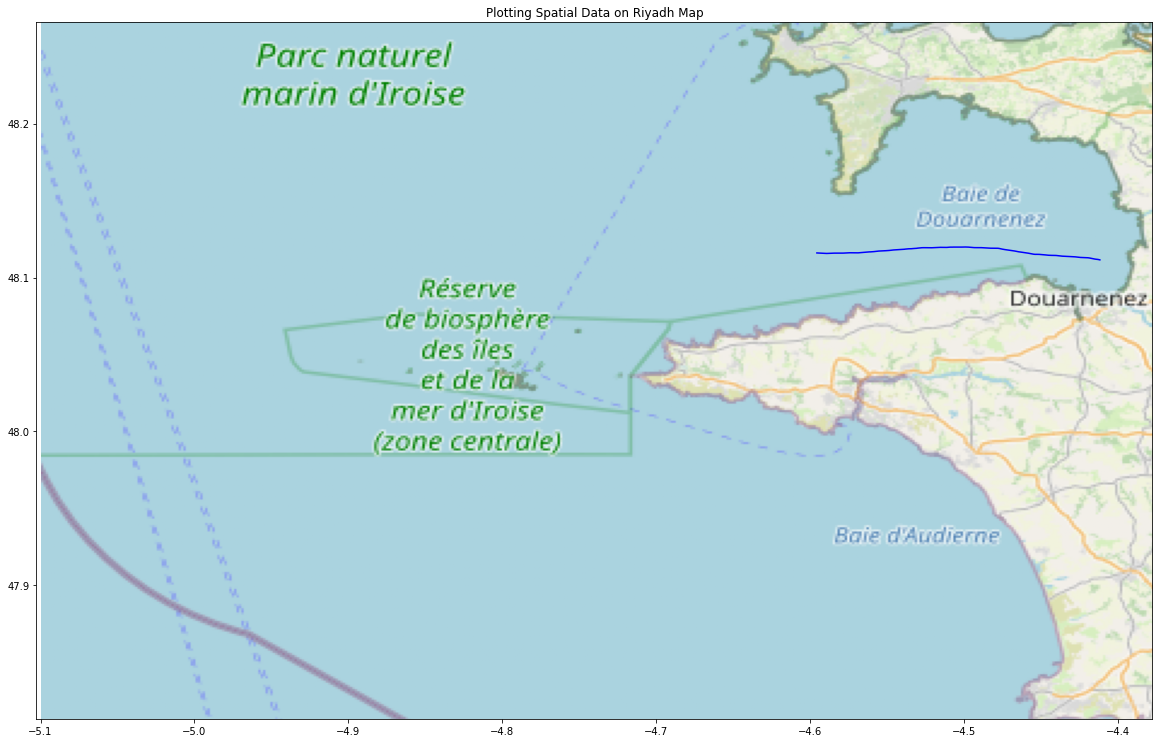

In [139]:
#area di pesca nella baia non riconosciuta dal lavoro dataAcron

data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))

data_show = data[((data['id']  == "228015700")  & (data['timestamp'] >= 1444019098000) & (data['timestamp'] <= 1444023086000))]

ruh_m = plt.imread('map_from_start_extended.png')

fig, ax = plt.subplots(figsize=(20,25))
ax.plot((data_show.longitude-0.07),(data_show.latitude-0.01), zorder=1, alpha=1, c='b')

ax.set_title('Plotting Spatial Data on Riyadh Map')


BBox2=((-5.1,-4.2,47.7,48.3))
#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')
plt.savefig('228015700.png')


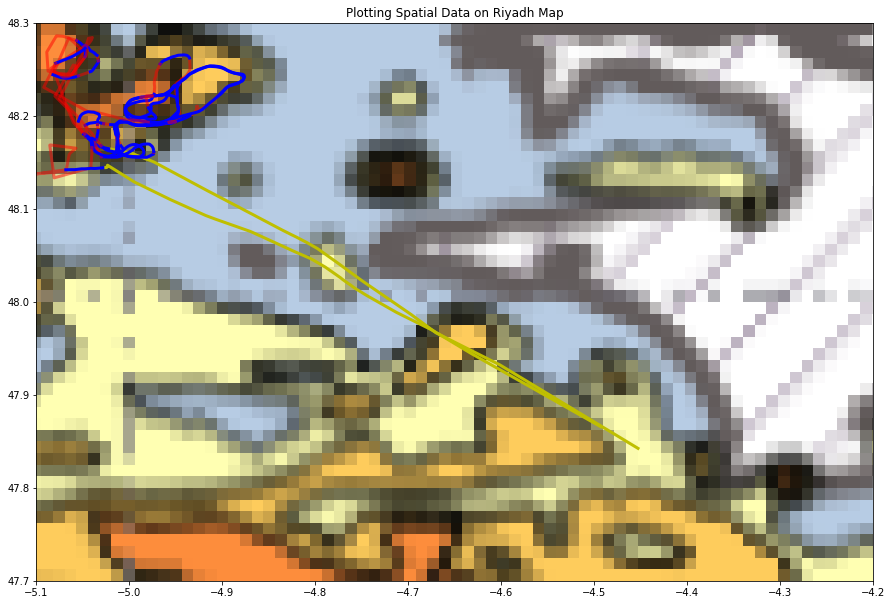

In [178]:
#Plotting delle traiettorie e dei trawling identificato dal lavoro dataAcron

data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]
#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
#ruh_m = plt.imread('map_from_start_extended.png')
ruh_m = plt.imread('fish_area.png')
BBox2=((-6,-4,47,49))
fig, ax = plt.subplots(figsize=(15,20))
#trawl
dtypes = {"start":'int64',"stop":'int64'}
data_traj = pd.read_csv('traj_228109000.csv', sep=',', usecols = ['start','stop'], dtype=dtypes, header=0)
t = False
data_traj['diff1'] = 0
data_traj['diff2'] = 0
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1445493329000) & (data['timestamp'] <= 1445593999000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)
for index, row in data_traj.iterrows():
    if index < len(data_traj)-1:
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['start']) & (data['timestamp'] <= row['stop']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['stop']) & (data['timestamp'] <= data_traj['start'][index+1]))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=0.5, c='r', linewidth=3)
        data_traj['diff1'][index] = (row['stop'] - row['start'])/(60*1000)
        data_traj['diff2'][index] = (data_traj['start'][index+1] - row['stop'])/(60*1000)
        #t=True
    else:
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['start']) & (data['timestamp'] <= row['stop']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)        
        #t=False
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1445793249000) & (data['timestamp'] <= 1445855534000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)


#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(-5.1,-4.2)
ax.set_ylim(47.7,48.3)




#BBox2=((-5.1,-4.2,47.7,48.3))
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')
plt.savefig('228109000_complete.png')

<ipython-input-177-6d743eabab1e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['timestamp1'] = data_traj['timestamp1'].apply(lambda x: x*1000)
<ipython-input-177-6d743eabab1e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['timestamp2'] = data_traj['timestamp2'].apply(lambda x: x*1000)
<ipython-input-177-6d743eabab1e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

0


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

1


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

2


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

3


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

4


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

5


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

6


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

7


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

8


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

9


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

10


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

11


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

12


<ipython-input-177-6d743eabab1e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
C:\Users\emiso\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-177-6d743eabab1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

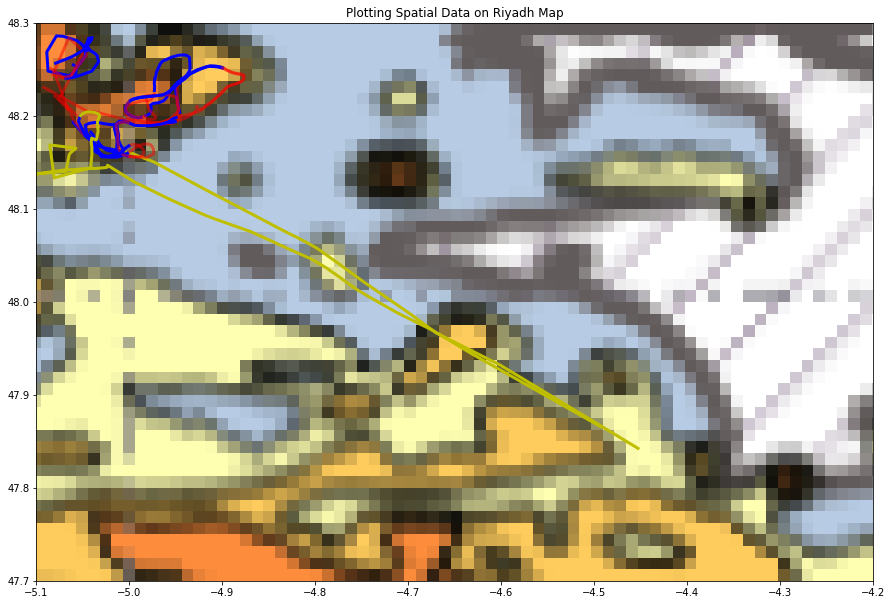

In [177]:
#Plotting delle traiettorie e dei trawling identificato dal lavoro dataAcron

data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]
#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
#ruh_m = plt.imread('map_from_start_extended.png')
ruh_m = plt.imread('fish_area.png')
BBox2=((-6,-4,47,49))
fig, ax = plt.subplots(figsize=(15,20))
#trawl
dtypes = {"start":'int64',"stop":'int64'}
#data_traj = pd.read_csv('traj_228109000.csv', sep=',', usecols = ['start','stop'], dtype=dtypes, header=0)
data_traj = data_kafka[((data_kafka['id']=="228109000") & (data_kafka['event']=="trawling") & (data_kafka['timestamp1']>=1445493329) & (data_kafka['timestamp2']<=1445855534))]
#data_traj.to_csv('traj_228109000_search.csv')
data_traj['timestamp1'] = data_traj['timestamp1'].apply(lambda x: x*1000)
data_traj['timestamp2'] = data_traj['timestamp2'].apply(lambda x: x*1000)
data_traj['diff1'] = 0
data_traj['diff2'] = 0
data_traj.reset_index(inplace=True)
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1445493329000) & (data['timestamp'] <= 1445592951000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)

for i, row in data_traj.iterrows():
    if i < len(data_traj)-1:
        print(i)
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['timestamp1']) & (data['timestamp'] <= row['timestamp2']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['timestamp2']) & (data['timestamp'] <= data_traj['timestamp1'][i+1]))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=0.5, c='r', linewidth=3)
        data_traj['diff1'][i] = (row['timestamp2'] - row['timestamp1'])/(60*1000)
        data_traj['diff2'][i] = (data_traj['timestamp1'][i+1] - row['timestamp2'])/(60*1000)
        #t=True
    else:
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['timestamp1']) & (data['timestamp'] <= row['timestamp2']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)        
        #t=False
    
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1445767084000) & (data['timestamp'] <= 1445855534000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)


#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(-5.1,-4.2)
ax.set_ylim(47.7,48.3)




#BBox2=((-5.1,-4.2,47.7,48.3))
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')
plt.savefig('test2.png')

In [160]:
data_traj = data_traj.drop('argument',1)
data_traj = data_traj.drop('value',1)

<ipython-input-72-cb6849e98ef3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['timestamp1'] = data_traj['timestamp1'].apply(lambda x: x*1000)
<ipython-input-72-cb6849e98ef3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['timestamp2'] = data_traj['timestamp2'].apply(lambda x: x*1000)
<ipython-input-72-cb6849e98ef3>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


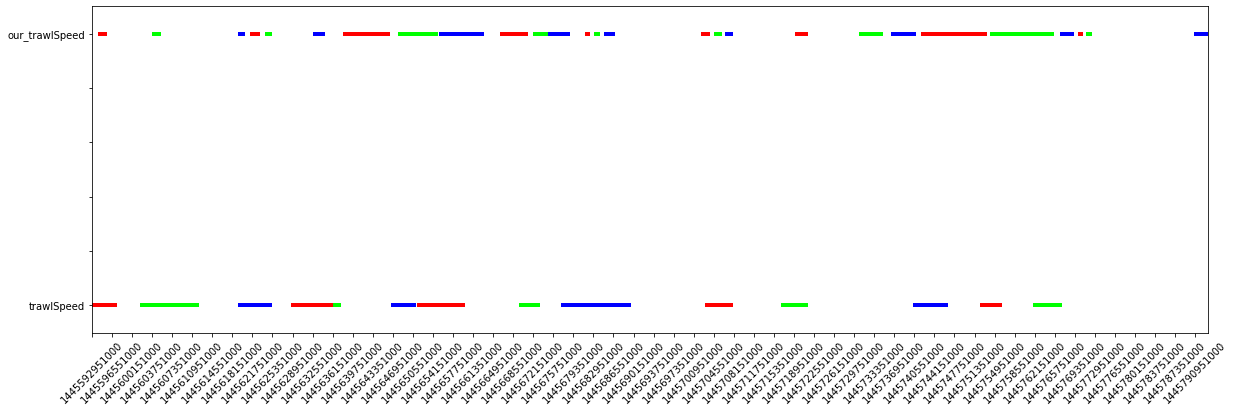

In [72]:
#Analisi di confronto temporale tra gli eventi riconosciuti da noi e quelli del lavoro dataAcron


from matplotlib import collections  as mc
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as dates
import pylab as pl
import numpy as np

#trawl
dtypes = {"start":'int64',"stop":'int64'}
data_traj = pd.read_csv('traj_228109000.csv', sep=',', usecols = ['start','stop'], dtype=dtypes, header=0)
list_x1 = data_traj['start'].to_list()
list_x2 = data_traj['stop'].to_list()
lines=[]
for i in range(0, data_traj['start'].shape[0]):
    lines.append([(list_x1[i],2),(list_x2[i],2)])


data_traj = data_kafka[((data_kafka['id']=="228109000") & (data_kafka['event']=="trawling") & (data_kafka['timestamp1']>=1445493329) & (data_kafka['timestamp2']<=1445855534))]
#data_traj.to_csv('traj_228109000_search.csv')
data_traj['timestamp1'] = data_traj['timestamp1'].apply(lambda x: x*1000)
data_traj['timestamp2'] = data_traj['timestamp2'].apply(lambda x: x*1000)
list_x1 = data_traj['timestamp1'].to_list()
list_x2 = data_traj['timestamp2'].to_list()
lines2=[]
for i in range(0, data_traj['timestamp1'].shape[0]):
    lines2.append([(list_x1[i],1),(list_x2[i],1)])

c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mc.LineCollection(lines, colors=c, linewidths=4)
lc2 = mc.LineCollection(lines2, colors=c, linewidths=4)
fig, ax = pl.subplots(figsize=(20,6))
ax.add_collection(lc)
ax.add_collection(lc2)
ax.autoscale()
ax.margins(0.1)

labels=['','trawlSpeed','','','','','our_trawlSpeed']
ax.set_yticklabels(labels)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.xlim([1445592950000, 1445793249000])
plt.xticks(np.arange(1445592951000, 1445793250000, (60*60*1000)))
plt.xticks(rotation=45)

plt.savefig('confronto_traj.png')

In [12]:
data_test = data_kafka[((data_kafka['event']=='trawling') & (data_kafka['timestamp1']<=1444953600))]

In [8]:

data_test2 = data_kafka[((data_kafka['id']=='228167900') & ((data_kafka['event']=='gap') | (data_kafka['event']=='trawlingMovement') | (data_kafka['event']=='trawlSpeed') | (data_kafka['event']=='trawling') | (data_kafka['event']=='withinArea')) &  (data_kafka['timestamp1']<=1446336000))]

In [13]:
data_test3 = data_kafka[((data_kafka['id']=='228015700') & ((data_kafka['event']=='gap') | (data_kafka['event']=='trawlingMovement') | (data_kafka['event']=='trawlSpeed') | (data_kafka['event']=='trawling') | (data_kafka['event']=='withinArea')) &  (data_kafka['timestamp1']<=1446336000))]

In [9]:
#Caricamento dataset completo e taglio sul periodo di interesse della specifica nave
dtypes = {"id":'str',"timestamp":'float',"longitude":'float',"latitude":'float',"annotation":'str', "speed":'float'}
data2 = pd.read_csv("ais_brest_positions_raw.csv",usecols=["longitude","latitude","timestamp","id", "speed"],dtype=dtypes)
data_test4 = data2[((data2['id'] == '228167900') & (data2['timestamp']>=1443735233000) & (data2['timestamp']<=1443736802000))]

In [9]:

data_test6 = data[((data['id'] == '228015700') & (data['timestamp']<=1446336000000) & (data['longitude']<=-5.0))]

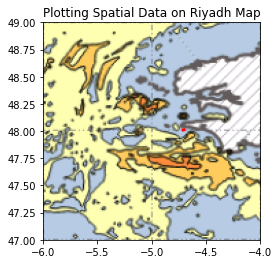

In [11]:
data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]
BBox = ((data_test4.longitude.min(), data_test4.longitude.max(), data_test4.latitude.min(), data_test4.latitude.max()))
ruh_m = plt.imread('fish_area.png')
BBox2=((-6,-4,47,49))
fig, ax = plt.subplots()
#trawl
dtypes = {"start":'int64',"stop":'int64'}


ax.plot(data_test4.longitude,data_test4.latitude, zorder=1, alpha=1, c='r', linewidth=3)



ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox2[0],BBox2[1])
ax.set_ylim(BBox2[2],BBox2[3])


#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')
plt.savefig('test_nave_fantasma.png')

BBox2 = ((data_test4.longitude.min(), data_test4.longitude.max(), data_test4.latitude.min(), data_test4.latitude.max()))